<a href="https://colab.research.google.com/github/path-0f-misantrope/Intensive-armatura/blob/%D0%BC%D0%B0%D1%80%D0%B0%D1%82/%D1%81%D0%BE%D0%B7%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%BF%D0%BE%D0%BB%D0%BD%D0%BE%D1%86%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE%20%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import copy
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#импорты
maindf = pd.read_excel('/content/train.xlsx')
gruzDF = pd.read_excel('/content/Грузоперевозки.xlsx')
materials = pd.read_excel('/content/Данные рынка стройматериалов.xlsx')
indexLME = pd.read_excel('/content/Индекс LME.xlsx')
makropokazateli = pd.read_excel('/content/Макропоказатели.xlsx')
toplivo =  pd.read_excel('/content/Топливо.xlsx')
metall = pd.read_excel('/content/Показатели рынка металла.xlsx')
surye  = pd.read_excel('/content/Цены на сырье.xlsx')
CHMF = pd.read_csv('/content/CHMF Акции.csv')
MAGN = pd.read_csv('/content/MAGN Акции.csv')
NLMK = pd.read_csv('/content/NLMK Акции.csv')
#загрузка датасетов

#чтоб удобно было
dfs = {
    "maindf": maindf,
    "gruzDF": gruzDF,
    "materials": materials,
    "indexLME": indexLME,
    "makropokazateli": makropokazateli,
    "toplivo": toplivo,
    "metall": metall,
    "surye": surye,
    "CHMF": CHMF,
    "MAGN": MAGN,
    "NLMK": NLMK
}

for df_name, df in dfs.items():
  print(f"DataFrame: {df_name}")
  df.info()
  print("-" * 50)


DataFrame: maindf
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                400 non-null    datetime64[ns]
 1   Цена на арматуру  400 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB
--------------------------------------------------
DataFrame: gruzDF
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   dt                               302 non-null    datetime64[ns]
 1   Индекс стоимости грузоперевозок  302 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.8 KB
--------------------------------------------------
DataFrame: materials
<class 'pandas.core.frame.D

везде все класс и круто кроме индксов мле и акций

In [ ]:
''' убирает из доп данных колонки слабо заполненые '''
def process_dataframe(df):
    threshold = 0.8
    nans_count = df.isna().sum()
    to_drop = nans_count[nans_count / len(df) > threshold].index
    df.drop(to_drop, axis=1, inplace=True)
    df.fillna(method='bfill', inplace=True)
    return df


dfs_to_process =   ["maindf",
"gruzDF",
"materials",
"indexLME",
"makropokazateli",
"toplivo",
"metall",
"surye",
"CHMF",
"MAGN",
"NLMK"]
for df_name in dfs_to_process:
  if df_name in dfs:
    dfs[df_name] = process_dataframe(dfs[df_name])




<ipython-input-2-82698932994c>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [ ]:


import pandas as pd

def drop_columns_with_high_zeros(df, threshold=0.8):
    """
    Удаляет столбцы, в которых доля нулей и NaN превышает пороговое значение (по умолчанию 80%).

    :param df: DataFrame
    :param threshold: Доля нулей и NaN, выше которой столбец удаляется
    :return: Очищенный DataFrame
    """
    zero_fraction = ((df == 0) | df.isna()).mean()  # Доля нулей и NaN в каждом столбце
    cols_to_drop = zero_fraction[zero_fraction > threshold].index
    return df.drop(columns=cols_to_drop)

# Пример использования:
# cleaned_df = drop_columns_with_high_zeros(merged_df, threshold=0.8)


# Функция для замены нулей на ближайшее ненулевое значение
def fill_zeros_with_nearest(df):
    """
    Заменяет нули на ближайшее ненулевое значение в каждом столбце DataFrame.
    Сначала заполняет вперед (метод ffill), затем назад (метод bfill).

    :param df: DataFrame
    :return: DataFrame с замененными нулями
    """
    df = df.replace(0, pd.NA)  # Меняем 0 на NaN (чтобы можно было заполнить)
    df = df.ffill().bfill()  # Заполняем сначала вперед, потом назад
    return df

# Применяем функции ко всем DataFrame в словаре dfs
for df_name, df in dfs.items():
    print(f"Обрабатываем: {df_name}")
    df = drop_columns_with_high_zeros(df)  # Удаляем столбцы с 80% нулей
    df = fill_zeros_with_nearest(df)  # Заменяем нули на ближайшие ненулевые значения
    dfs[df_name] = df  # Обновляем в словаре


Обрабатываем: maindf
Обрабатываем: gruzDF
Обрабатываем: materials
Обрабатываем: indexLME
Обрабатываем: makropokazateli
Обрабатываем: toplivo
Обрабатываем: metall
Обрабатываем: surye
Обрабатываем: CHMF
Обрабатываем: MAGN
Обрабатываем: NLMK


<ipython-input-3-ecbbbfa56f02>:29: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.ffill().bfill()  # Заполняем сначала вперед, потом назад


In [ ]:

# конвертир the 'цена' в индекс мле в флоат
indexLME['цена'] = pd.to_numeric(indexLME['цена'], errors='coerce')


In [ ]:
#ну просто чекал
dfs_to_check = ["NLMK", "MAGN", "CHMF", "indexLME"]

for df_name in dfs_to_check:
    if df_name in dfs:
        print(f"DataFrame: {df_name}")
        dfs[df_name].info()
        print("-" * 50)
    else:
        print(f"Warning: DataFrame '{df_name}' not found in the 'dfs' dictionary.")


DataFrame: NLMK
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1053 non-null   object 
 1   Price     1053 non-null   float64
 2   Open      1053 non-null   float64
 3   High      1053 non-null   float64
 4   Low       1053 non-null   float64
 5   Vol.      1053 non-null   object 
 6   Change %  1053 non-null   object 
dtypes: float64(4), object(3)
memory usage: 57.7+ KB
--------------------------------------------------
DataFrame: MAGN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Дата    1053 non-null   object
 1   Цена    1053 non-null   object
 2   Откр.   1053 non-null   object
 3   Макс.   1053 non-null   object
 4   Мин.    1053 non-null   object
 5   Объём   1053 non-null   object
 6   Изм. %  

In [ ]:
def clean_numeric_dataframe(df):
    """
    Функция принимает DFи преобразует числовые
   убирает запятые (разделители касарей).
   преобразует к в косарь, 'M' в лимоны, 'B' в лярды.
  убирает '%', процентные значения в числовые.
    конвертирует все обработанные колонки в флоат.
    ваще это только для акций нужно, но там короче 2 на англе, и надо "дата" на "date" поменять и еще раз запустить
    """

    df_clean = df.copy()

    for col in df_clean.columns:
        if df_clean[col].dtype == "object":

            df_clean[col] = df_clean[col].str.replace(",", "", regex=True)


            df_clean[col] = df_clean[col].str.replace("K", "*1000", regex=True)
            df_clean[col] = df_clean[col].str.replace("M", "*1000000", regex=True)
            df_clean[col] = df_clean[col].str.replace("B", "*1000000000", regex=True)


            df_clean[col] = df_clean[col].str.rstrip("%")

            try:
                df_clean[col] = df_clean[col].apply(pd.eval).astype(float)
            except:
                pass #скип если чет не так

    return df_clean
CHMF = clean_numeric_dataframe(CHMF)
MAGN = clean_numeric_dataframe(MAGN)
NLMK = clean_numeric_dataframe(NLMK)

In [ ]:
CHMF.info()
print(MAGN.info())
print(NLMK.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1054 non-null   object 
 1   Price     1054 non-null   float64
 2   Open      1054 non-null   float64
 3   High      1054 non-null   float64
 4   Low       1054 non-null   float64
 5   Vol.      1054 non-null   float64
 6   Change %  1054 non-null   float64
dtypes: float64(6), object(1)
memory usage: 57.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Дата    1053 non-null   object 
 1   Цена    1053 non-null   float64
 2   Откр.   1053 non-null   float64
 3   Макс.   1053 non-null   float64
 4   Мин.    1053 non-null   float64
 5   Объём   1053 non-null   float64
 6   Изм. %  1053 non-null   object 
dtypes: float64(5), object(2)
memory usage: 57.7+ K

In [ ]:


#конвертация всех временнных сталбов к единому формату
def convert_datetime_columns(df):
    for col in df.columns:
        if pd.api.types.is_datetime64_any_dtype(df[col]):
            df[col] = df[col].dt.strftime('%d.%m.%Y')
    return df


for df_name, df in dfs.items():
    dfs[df_name] = convert_datetime_columns(df)


In [ ]:
indexLME = indexLME.rename(columns={"дата":"dt"})
CHMF = CHMF.rename(columns={"Date":"dt"})
MAGN = MAGN.rename(columns={"Дата":"dt"})
NLMK= NLMK.rename(columns={"Date":"dt"})


In [ ]:
CHMF.head(), NLMK.info(), MAGN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dt        1053 non-null   object 
 1   Price     1053 non-null   float64
 2   Open      1053 non-null   float64
 3   High      1053 non-null   float64
 4   Low       1053 non-null   float64
 5   Vol.      1053 non-null   float64
 6   Change %  1053 non-null   float64
dtypes: float64(6), object(1)
memory usage: 57.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dt      1053 non-null   object 
 1   Цена    1053 non-null   float64
 2   Откр.   1053 non-null   float64
 3   Макс.   1053 non-null   float64
 4   Мин.    1053 non-null   float64
 5   Объём   1053 non-null   float64
 6   Изм. %  1053 non-null   object 
dtypes: float64(5), object(2)
memory usage: 57.7+ K

(           dt   Price    Open    High     Low       Vol.  Change %
 0  03/31/2023  1043.2  1061.0  1061.0  1042.0   571720.0     -1.68
 1  03/30/2023  1061.0  1074.6  1084.8  1058.0  1300000.0     -1.27
 2  03/29/2023  1074.6  1040.6  1078.4  1035.4  1790000.0      3.53
 3  03/28/2023  1038.0  1041.4  1044.0  1033.0   269090.0     -0.17
 4  03/27/2023  1039.8  1036.2  1042.6  1032.2   410740.0      0.50,
 None,
 None)

In [ ]:
CHMF["dt"] = pd.to_datetime(CHMF["dt"], dayfirst=True)
NLMK["dt"] = pd.to_datetime(NLMK["dt"],  dayfirst=True)
MAGN["dt"]  = pd.to_datetime(MAGN["dt"], dayfirst=True)
CHMF.head(), NLMK.info(), MAGN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   dt        1053 non-null   datetime64[ns]
 1   Price     1053 non-null   float64       
 2   Open      1053 non-null   float64       
 3   High      1053 non-null   float64       
 4   Low       1053 non-null   float64       
 5   Vol.      1053 non-null   float64       
 6   Change %  1053 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 57.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dt      1053 non-null   datetime64[ns]
 1   Цена    1053 non-null   float64       
 2   Откр.   1053 non-null   float64       
 3   Макс.   1053 non-null   float64       
 4   Мин.    1053 non-null   float64       
 5   О

<ipython-input-11-ef4949b9c226>:1: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  CHMF["dt"] = pd.to_datetime(CHMF["dt"], dayfirst=True)
<ipython-input-11-ef4949b9c226>:2: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  NLMK["dt"] = pd.to_datetime(NLMK["dt"],  dayfirst=True)


(          dt   Price    Open    High     Low       Vol.  Change %
 0 2023-03-31  1043.2  1061.0  1061.0  1042.0   571720.0     -1.68
 1 2023-03-30  1061.0  1074.6  1084.8  1058.0  1300000.0     -1.27
 2 2023-03-29  1074.6  1040.6  1078.4  1035.4  1790000.0      3.53
 3 2023-03-28  1038.0  1041.4  1044.0  1033.0   269090.0     -0.17
 4 2023-03-27  1039.8  1036.2  1042.6  1032.2   410740.0      0.50,
 None,
 None)

In [ ]:
'''merged_df = pd.merge(maindf, CHMF, on='dt', how='outer')
merged_df = pd.merge(merged_df, MAGN, on='dt', how='outer')
merged_df = pd.merge(merged_df, NLMK, on='dt', how='outer')
merged_df = pd.merge(merged_df, materials, on='dt', how='outer')
merged_df = pd.merge(merged_df, makropokazateli, on='dt', how='outer')
merged_df = pd.merge(merged_df, indexLME, on='dt', how='outer')
merged_df = pd.merge(merged_df, surye, on='dt', how='outer')
merged_df = pd.merge(merged_df, toplivo, on='dt', how='outer')
merged_df = pd.merge(merged_df, metall, on='dt', how='outer')
merged_df = pd.merge(merged_df, gruzDF, on='dt', how='outer')


# Сортировка по dt
merged_df = merged_df.sort_values("dt").reset_index(drop=True)
merged_df.head()
'''
merged_df = maindf  # Начинаем с основного датафрейма

for df in [CHMF, MAGN, NLMK, materials, makropokazateli, indexLME, surye, toplivo, metall, gruzDF]:
    merged_df = pd.merge(merged_df, df, on="dt", how="left")  # Только даты из maindf

# Сортируем и сбрасываем индекс
merged_df = merged_df.sort_values("dt").reset_index(drop=True)

merged_df.head()


,dt,Цена на арматуру,Price_x,Open_x,High_x,Low_x,Vol._x,Change %_x,Цена,Откр.,...,Экспорт сырья Лом_Лом чугуна,Экспорт сырья Металлизованная продукция_Всего отгружено с предприятия,Экспорт сырья Металлизованная продукция_ГБЖ,Экспорт сырья Чугун_Всего отгружено с предприятия,Экспорт сырья Чугун_Литейный чугун,Экспорт сырья Чугун_Передельный чугун,Экспорт арматуры Сортовой прокат_Арматура,Экспорт арматуры Сортовой прокат_Катанка,Экспорт арматуры Сортовой прокат_Прутки прочие,Индекс стоимости грузоперевозок
0,2015-01-05,32900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-12,32500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-19,32000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-26,30700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-02-02,30300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_df.to_csv("merged.csv", index=False, encoding="utf-8-sig")
from google.colab import files
files.download("merged.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

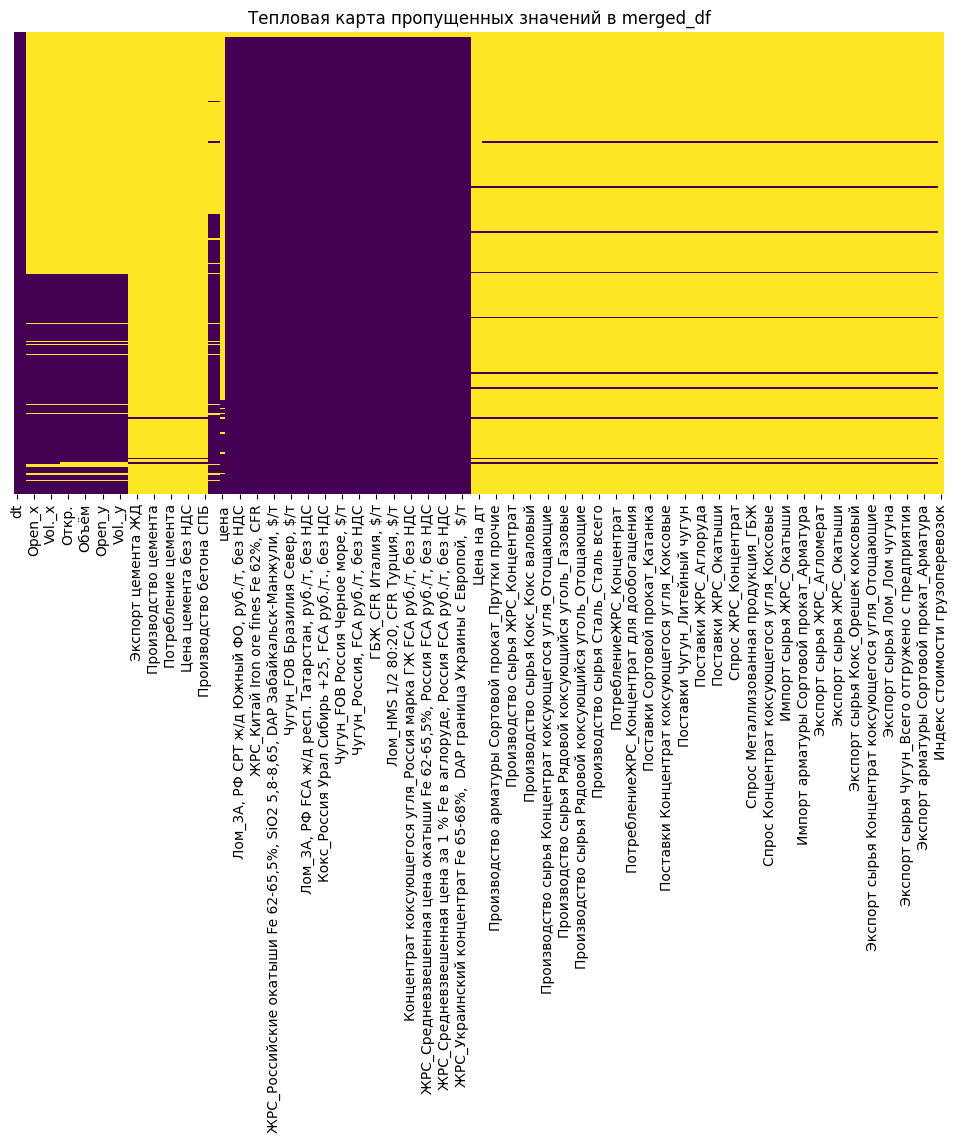

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем размер графика
plt.figure(figsize=(12, 6))

# Тепловая карта пропусков
sns.heatmap(merged_df.isnull(), cmap="viridis", cbar=False, yticklabels=False)

plt.title("Тепловая карта пропущенных значений в merged_df")
plt.show()


In [ ]:
import pandas as pd

# Список колонок, которые нужно заполнить
monthly_columns = ['Цена на арматуру', 'Price_x', 'Open_x', 'High_x', 'Low_x', 'Vol._x', 'Change %_x', 'Цена', 'Откр.', 'Макс.', 'Мин.', 'Объём', 'Изм. %', 'Price_y', 'Open_y', 'High_y', 'Low_y', 'Vol._y', 'Change %_y',
    "Импорт цемента ЖД", "Экспорт цемента ЖД", "Отгрузка цемента хоппер ЖД", "Отгрузка цемента остальные ЖД",
    "Производство цемента", "Импорт цемента", "Экспорт цемента", "Потребление цемента", "Отгрузка цемента",
    "Цена цемента с НДС", "Цена цемента без НДС", "Производство бетона РФ", "Производство бетона МО", "Производство бетона СПБ"
] +  ['Цена на бензин', 'Цена на дт', 'Производство арматуры Сортовой прокат_Арматура', 'Производство арматуры Сортовой прокат_Катанка', 'Производство арматуры Сортовой прокат_Прутки прочие', 'Производство сырья ЖРС_Агломерат', 'Производство сырья ЖРС_Аглоруда', 'Производство сырья ЖРС_Концентрат', 'Производство сырья ЖРС_Концентрат для дообогащения', 'Производство сырья ЖРС_Окатыши', 'Производство сырья Кокс_Кокс валовый', 'Производство сырья Концентрат коксующегося угля_Жирные', 'Производство сырья Концентрат коксующегося угля_Коксовые', 'Производство сырья Концентрат коксующегося угля_Отощающие', 'Производство сырья Металлизованная продукция_ГБЖ', 'Производство сырья Металлизованная продукция_ПВЖ', 'Производство сырья Рядовой коксующийся уголь_Газовые', 'Производство сырья Рядовой коксующийся уголь_Жирные', 'Производство сырья Рядовой коксующийся уголь_Коксовые', 'Производство сырья Рядовой коксующийся уголь_Отощающие', 'Производство сырья Сталь_Конвертер', 'Производство сырья Сталь_Мартен', 'Производство сырья Сталь_Сталь всего', 'Производство сырья Сталь_Электропечь', 'Производство сырья Чугун_Чугун', 'ПотреблениеЖРС_Концентрат', 'ПотреблениеЖРС_Агломерат', 'ПотреблениеЖРС_Окатыши', 'ПотреблениеЖРС_Концентрат для дообогащения', 'ПотреблениеЖРС_Аглоруда', 'Поставки Сортовой прокат_Арматура', 'Поставки Сортовой прокат_Катанка', 'Поставки Сортовой прокат_Прутки прочие', 'Поставки Концентрат коксующегося угля_Жирные', 'Поставки Концентрат коксующегося угля_Коксовые', 'Поставки Концентрат коксующегося угля_Отощающие', 'Поставки Кокс_Кокс доменный', 'Поставки Чугун_Литейный чугун', 'Поставки Чугун_Передельный чугун', 'Поставки ЖРС_Агломерат', 'Поставки ЖРС_Аглоруда', 'Поставки ЖРС_Концентрат', 'Поставки ЖРС_Концентрат для дообогащения', 'Поставки ЖРС_Окатыши', 'Спрос ЖРС_Агломерат', 'Спрос ЖРС_Аглоруда', 'Спрос ЖРС_Концентрат', 'Спрос ЖРС_Концентрат для дообогащения', 'Спрос ЖРС_Окатыши', 'Спрос Металлизованная продукция_ГБЖ', 'Спрос Кокс_Кокс доменный', 'Спрос Концентрат коксующегося угля_Жирные', 'Спрос Концентрат коксующегося угля_Коксовые', 'Спрос Концентрат коксующегося угля_Отощающие', 'Импорт сырья ЖРС_Концентрат', 'Импорт сырья ЖРС_Окатыши', 'Импорт сырья Концентрат коксующегося угля_Жирные', 'Импорт сырья Концентрат коксующегося угля_Коксовые', 'Импорт арматуры Сортовой прокат_Арматура', 'Импорт арматуры Сортовой прокат_Катанка', 'Импорт арматуры Сортовой прокат_Прутки прочие', 'Экспорт сырья ЖРС_Агломерат', 'Экспорт сырья ЖРС_Аглоруда', 'Экспорт сырья ЖРС_Концентрат', 'Экспорт сырья ЖРС_Окатыши', 'Экспорт сырья Кокс_Кокс доменный', 'Экспорт сырья Кокс_Мелочь коксовая', 'Экспорт сырья Кокс_Орешек коксовый', 'Экспорт сырья Концентрат коксующегося угля_Жирные', 'Экспорт сырья Концентрат коксующегося угля_Коксовые', 'Экспорт сырья Концентрат коксующегося угля_Отощающие', 'Экспорт сырья Лом_Лом коррозионностойкой стали', 'Экспорт сырья Лом_Лом стальной', 'Экспорт сырья Лом_Лом чугуна', 'Экспорт сырья Металлизованная продукция_Всего отгружено с предприятия', 'Экспорт сырья Металлизованная продукция_ГБЖ', 'Экспорт сырья Чугун_Всего отгружено с предприятия', 'Экспорт сырья Чугун_Литейный чугун', 'Экспорт сырья Чугун_Передельный чугун', 'Экспорт арматуры Сортовой прокат_Арматура', 'Экспорт арматуры Сортовой прокат_Катанка', 'Экспорт арматуры Сортовой прокат_Прутки прочие', 'Индекс стоимости грузоперевозок']


# 1. Преобразуем dt в формат "YYYY-MM"
merged_df["dt"] = pd.to_datetime(merged_df["dt"]).dt.to_period("M")

# 2. Сортируем по дате (чтобы ffill работал правильно)
merged_df = merged_df.sort_values("dt").reset_index(drop=True)

# 3. Заполняем пропущенные значения ТОЛЬКО в monthly_columns, используя данные предыдущего месяца
merged_df[monthly_columns] = merged_df[monthly_columns].fillna(method="ffill")

# 4. Восстанавливаем формат dt обратно в Timestamp
merged_df["dt"] = merged_df["dt"].dt.to_timestamp()

# Готово!
print(merged_df.head())


          dt  Цена на арматуру  Price_x  Open_x  High_x  Low_x  Vol._x  \
0 2015-01-01             32900      NaN     NaN     NaN    NaN     NaN   
1 2015-01-01             32500      NaN     NaN     NaN    NaN     NaN   
2 2015-01-01             32000      NaN     NaN     NaN    NaN     NaN   
3 2015-01-01             30700      NaN     NaN     NaN    NaN     NaN   
4 2015-02-01             30300      NaN     NaN     NaN    NaN     NaN   

   Change %_x  Цена  Откр.  ...  Экспорт сырья Лом_Лом чугуна  \
0         NaN   NaN    NaN  ...                           NaN   
1         NaN   NaN    NaN  ...                           NaN   
2         NaN   NaN    NaN  ...                           NaN   
3         NaN   NaN    NaN  ...                           NaN   
4         NaN   NaN    NaN  ...                           NaN   

   Экспорт сырья Металлизованная продукция_Всего отгружено с предприятия  \
0                                                NaN                       
1           

<ipython-input-15-e76616213193>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df[monthly_columns] = merged_df[monthly_columns].fillna(method="ffill")


In [ ]:
import pandas as pd

# Список колонок, которые нужно заполнить
cement_columns = [
    'Цена на арматуру', 'Price_x', 'Open_x', 'High_x', 'Low_x', 'Vol._x', 'Change %_x', 'Цена', 'Откр.', 'Макс.', 'Мин.', 'Объём', 'Изм. %', 'Price_y', 'Open_y', 'High_y', 'Low_y', 'Vol._y', 'Change %_y',"Импорт цемента ЖД", "Экспорт цемента ЖД", "Отгрузка цемента хоппер ЖД", "Отгрузка цемента остальные ЖД",
    "Производство цемента", "Импорт цемента", "Экспорт цемента", "Потребление цемента", "Отгрузка цемента",
    "Цена цемента с НДС", "Цена цемента без НДС", "Производство бетона РФ", "Производство бетона МО", "Производство бетона СПБ"
] +  ['Цена на бензин', 'Цена на дт', 'Производство арматуры Сортовой прокат_Арматура', 'Производство арматуры Сортовой прокат_Катанка', 'Производство арматуры Сортовой прокат_Прутки прочие', 'Производство сырья ЖРС_Агломерат', 'Производство сырья ЖРС_Аглоруда', 'Производство сырья ЖРС_Концентрат', 'Производство сырья ЖРС_Концентрат для дообогащения', 'Производство сырья ЖРС_Окатыши', 'Производство сырья Кокс_Кокс валовый', 'Производство сырья Концентрат коксующегося угля_Жирные', 'Производство сырья Концентрат коксующегося угля_Коксовые', 'Производство сырья Концентрат коксующегося угля_Отощающие', 'Производство сырья Металлизованная продукция_ГБЖ', 'Производство сырья Металлизованная продукция_ПВЖ', 'Производство сырья Рядовой коксующийся уголь_Газовые', 'Производство сырья Рядовой коксующийся уголь_Жирные', 'Производство сырья Рядовой коксующийся уголь_Коксовые', 'Производство сырья Рядовой коксующийся уголь_Отощающие', 'Производство сырья Сталь_Конвертер', 'Производство сырья Сталь_Мартен', 'Производство сырья Сталь_Сталь всего', 'Производство сырья Сталь_Электропечь', 'Производство сырья Чугун_Чугун', 'ПотреблениеЖРС_Концентрат', 'ПотреблениеЖРС_Агломерат', 'ПотреблениеЖРС_Окатыши', 'ПотреблениеЖРС_Концентрат для дообогащения', 'ПотреблениеЖРС_Аглоруда', 'Поставки Сортовой прокат_Арматура', 'Поставки Сортовой прокат_Катанка', 'Поставки Сортовой прокат_Прутки прочие', 'Поставки Концентрат коксующегося угля_Жирные', 'Поставки Концентрат коксующегося угля_Коксовые', 'Поставки Концентрат коксующегося угля_Отощающие', 'Поставки Кокс_Кокс доменный', 'Поставки Чугун_Литейный чугун', 'Поставки Чугун_Передельный чугун', 'Поставки ЖРС_Агломерат', 'Поставки ЖРС_Аглоруда', 'Поставки ЖРС_Концентрат', 'Поставки ЖРС_Концентрат для дообогащения', 'Поставки ЖРС_Окатыши', 'Спрос ЖРС_Агломерат', 'Спрос ЖРС_Аглоруда', 'Спрос ЖРС_Концентрат', 'Спрос ЖРС_Концентрат для дообогащения', 'Спрос ЖРС_Окатыши', 'Спрос Металлизованная продукция_ГБЖ', 'Спрос Кокс_Кокс доменный', 'Спрос Концентрат коксующегося угля_Жирные', 'Спрос Концентрат коксующегося угля_Коксовые', 'Спрос Концентрат коксующегося угля_Отощающие', 'Импорт сырья ЖРС_Концентрат', 'Импорт сырья ЖРС_Окатыши', 'Импорт сырья Концентрат коксующегося угля_Жирные', 'Импорт сырья Концентрат коксующегося угля_Коксовые', 'Импорт арматуры Сортовой прокат_Арматура', 'Импорт арматуры Сортовой прокат_Катанка', 'Импорт арматуры Сортовой прокат_Прутки прочие', 'Экспорт сырья ЖРС_Агломерат', 'Экспорт сырья ЖРС_Аглоруда', 'Экспорт сырья ЖРС_Концентрат', 'Экспорт сырья ЖРС_Окатыши', 'Экспорт сырья Кокс_Кокс доменный', 'Экспорт сырья Кокс_Мелочь коксовая', 'Экспорт сырья Кокс_Орешек коксовый', 'Экспорт сырья Концентрат коксующегося угля_Жирные', 'Экспорт сырья Концентрат коксующегося угля_Коксовые', 'Экспорт сырья Концентрат коксующегося угля_Отощающие', 'Экспорт сырья Лом_Лом коррозионностойкой стали', 'Экспорт сырья Лом_Лом стальной', 'Экспорт сырья Лом_Лом чугуна', 'Экспорт сырья Металлизованная продукция_Всего отгружено с предприятия', 'Экспорт сырья Металлизованная продукция_ГБЖ', 'Экспорт сырья Чугун_Всего отгружено с предприятия', 'Экспорт сырья Чугун_Литейный чугун', 'Экспорт сырья Чугун_Передельный чугун', 'Экспорт арматуры Сортовой прокат_Арматура', 'Экспорт арматуры Сортовой прокат_Катанка', 'Экспорт арматуры Сортовой прокат_Прутки прочие', 'Индекс стоимости грузоперевозок']

# 1. Приводим даты к периоду "год-месяц"
merged_df["dt"] = pd.to_datetime(merged_df["dt"]).dt.to_period("M")

# 2. Заполняем пропуски данными из ближайшего доступного года
for year in range(merged_df["dt"].dt.year.min(), merged_df["dt"].dt.year.max()):  # Перебираем года
    for month in range(1, 13):  # Перебираем месяцы
        mask_current = (merged_df["dt"].dt.year == year) & (merged_df["dt"].dt.month == month)

        # Ищем ближайший год, где есть данные
        value = None
        for next_year in range(year + 1, merged_df["dt"].dt.year.max() + 1):
            mask_next = (merged_df["dt"].dt.year == next_year) & (merged_df["dt"].dt.month == month)
            available_data = merged_df.loc[mask_next, cement_columns].dropna(how="all")  # Берём первую непустую строку

            if not available_data.empty:
                value = available_data.iloc[0]  # Берём первую известную строку
                break  # Нашли данные — выходим из цикла

        # Если нашли данные, заполняем пропуски
        if value is not None:
            merged_df.loc[mask_current, cement_columns] = merged_df.loc[mask_current, cement_columns].fillna(value)

# 3. Восстанавливаем формат дат в Timestamp
merged_df["dt"] = merged_df["dt"].dt.to_timestamp()

# 4. Дополнительно заполняем оставшиеся NaN методом forward fill
merged_df[cement_columns] = merged_df[cement_columns].fillna(method="ffill")

# Готово!
print(merged_df.head())

<ipython-input-16-bb5900687158>:30: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df.loc[mask_current, cement_columns] = merged_df.loc[mask_current, cement_columns].fillna(value)
<ipython-input-16-bb5900687158>:30: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df.loc[mask_current, cement_columns] = merged_df.loc[mask_current, cement_columns].fillna(value)
<ipython-input-16-bb5900687158>:30: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(c

          dt  Цена на арматуру  Price_x  Open_x  High_x  Low_x  Vol._x  \
0 2015-01-01             32900      NaN     NaN     NaN    NaN     NaN   
1 2015-01-01             32500      NaN     NaN     NaN    NaN     NaN   
2 2015-01-01             32000      NaN     NaN     NaN    NaN     NaN   
3 2015-01-01             30700      NaN     NaN     NaN    NaN     NaN   
4 2015-02-01             30300      NaN     NaN     NaN    NaN     NaN   

   Change %_x  Цена  Откр.  ...  Экспорт сырья Лом_Лом чугуна  \
0         NaN   NaN    NaN  ...                           NaN   
1         NaN   NaN    NaN  ...                           NaN   
2         NaN   NaN    NaN  ...                           NaN   
3         NaN   NaN    NaN  ...                           NaN   
4         NaN   NaN    NaN  ...                           NaN   

   Экспорт сырья Металлизованная продукция_Всего отгружено с предприятия  \
0                                                NaN                       
1           

<ipython-input-16-bb5900687158>:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df[cement_columns] = merged_df[cement_columns].fillna(method="ffill")


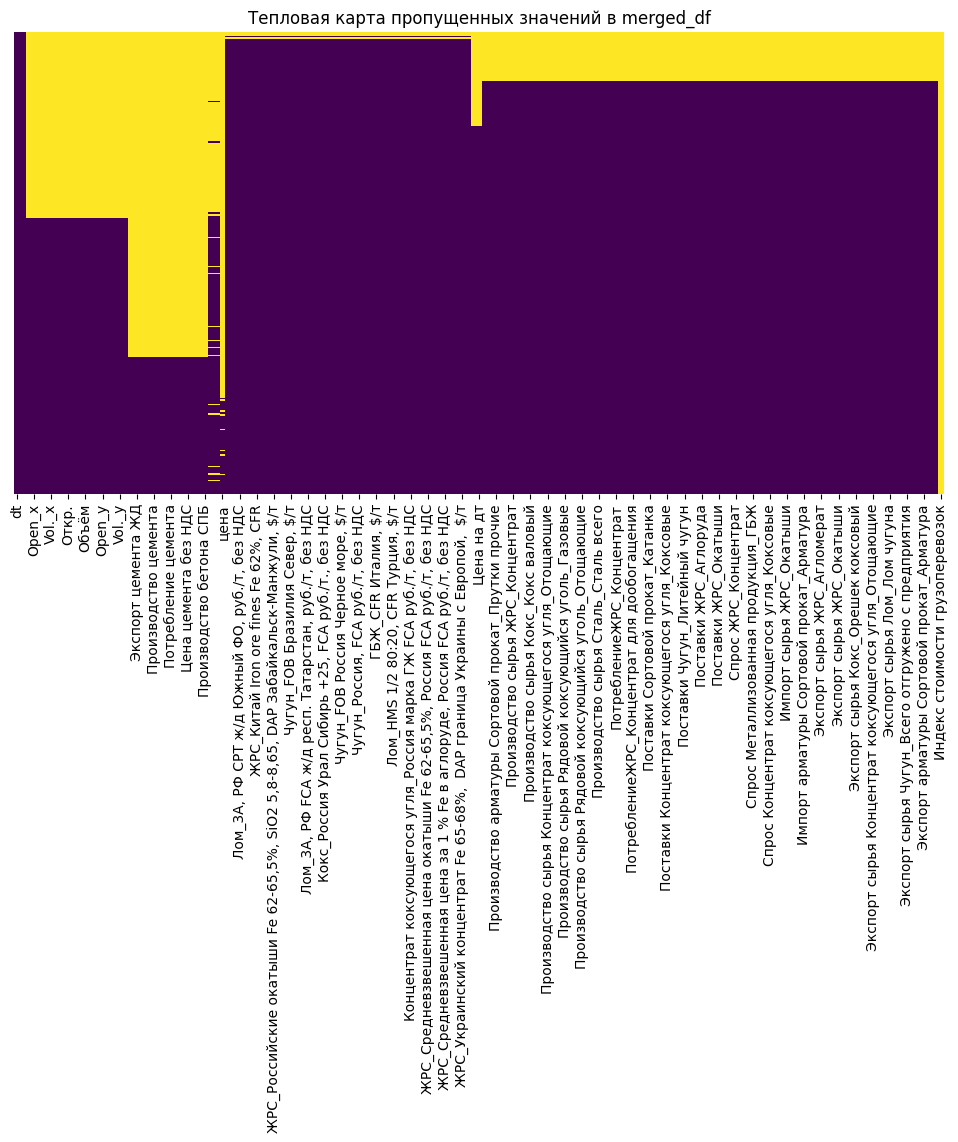

In [ ]:
# Устанавливаем размер графика
plt.figure(figsize=(12, 6))

# Тепловая карта пропусков
sns.heatmap(merged_df.isnull(), cmap="viridis", cbar=False, yticklabels=False)

plt.title("Тепловая карта пропущенных значений в merged_df")
plt.show()

In [ ]:
merged_df["month"] = merged_df["dt"].dt.to_period("M")  # Формат YYYY-MM
merged_df[monthly_columns] = merged_df.groupby("month")[monthly_columns].transform(lambda x: x.fillna(x.mean()))

merged_df[monthly_columns] = merged_df[monthly_columns].fillna(method="bfill")

print(merged_df[merged_df["dt"].isna()])
for col in monthly_columns:
    merged_df[col] = merged_df.groupby("month")[col].transform(lambda x: x.fillna(x.mean()))
    merged_df[col] = merged_df[col].fillna(method="ffill").fillna(method="bfill")



<ipython-input-20-009bc1eb8b5e>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df[monthly_columns] = merged_df[monthly_columns].fillna(method="bfill")
<ipython-input-20-009bc1eb8b5e>:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df[col] = merged_df[col].fillna(method="ffill").fillna(method="bfill")


Empty DataFrame
Columns: [dt, Цена на арматуру, Price_x, Open_x, High_x, Low_x, Vol._x, Change %_x, Цена, Откр., Макс., Мин., Объём, Изм. %, Price_y, Open_y, High_y, Low_y, Vol._y, Change %_y, Импорт цемента ЖД, Экспорт цемента ЖД, Отгрузка цемента хоппер ЖД, Отгрузка цемента остальные ЖД, Производство цемента, Импорт цемента, Экспорт цемента, Потребление цемента, Отгрузка цемента, Цена цемента с НДС, Цена цемента без НДС, Производство бетона РФ, Производство бетона МО, Производство бетона СПБ, Ключевая ставка, Курс доллара, цена, Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС, Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т, Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС, Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС, Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС, ЖРС_Китай Iron ore fines Fe 62%, CFR, Чугун_CFR Италия, $/т, Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС, ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8,65, DAP Забайкальск-Манжули, $/т,

<ipython-input-21-fde43a2b58af>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df[monthly_columns] = merged_df[monthly_columns].fillna(method="ffill")


Index([], dtype='object')


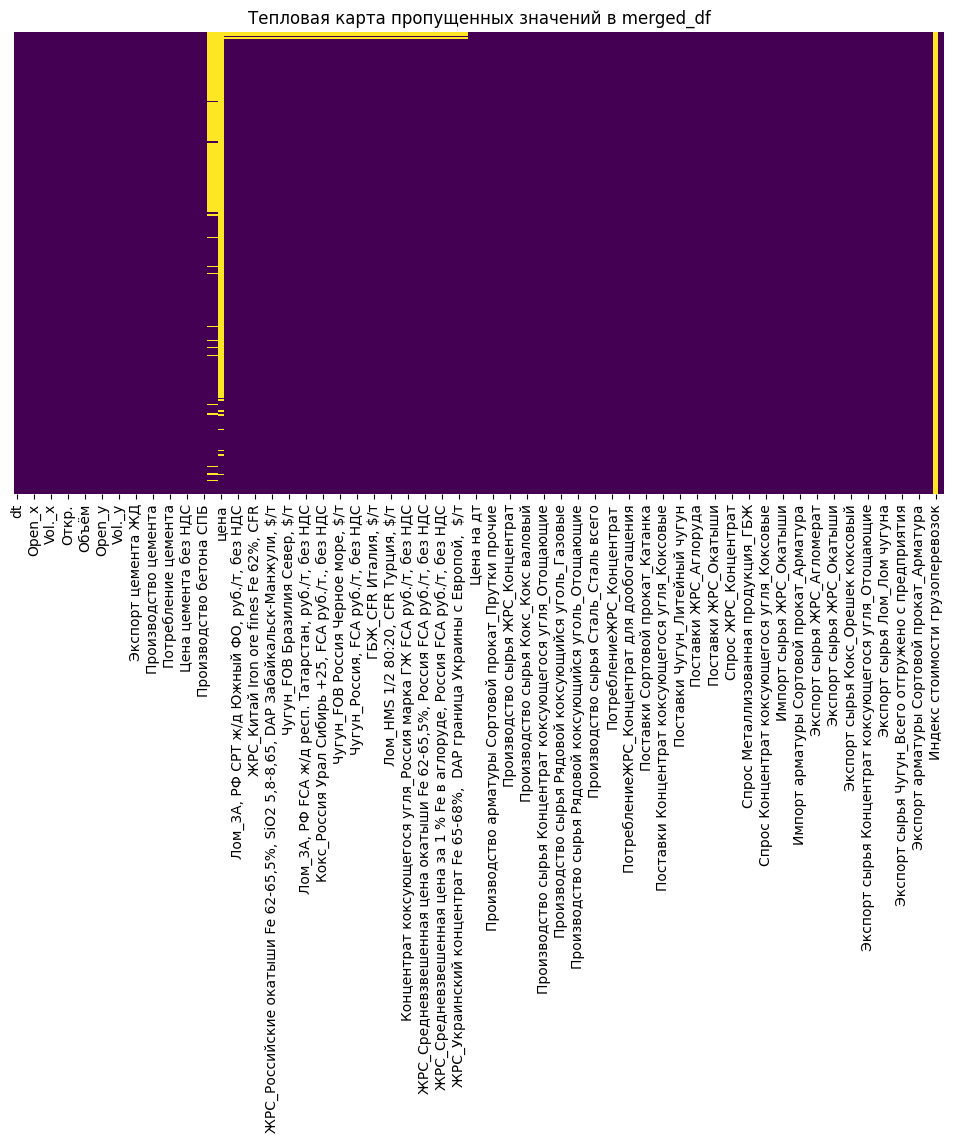

In [ ]:
merged_df[monthly_columns] = merged_df[monthly_columns].apply(pd.to_numeric, errors="coerce")
merged_df[monthly_columns] = merged_df[monthly_columns].fillna(method="ffill")
#print(merged_df[monthly_columns].dtypes)  # Посмотрим типы данных
object_columns = merged_df.select_dtypes(include=["object"]).columns
print(object_columns)

plt.figure(figsize=(12, 6))

# Тепловая карта пропусков
sns.heatmap(merged_df.isnull(), cmap="viridis", cbar=False, yticklabels=False)

plt.title("Тепловая карта пропущенных значений в merged_df")
plt.show()

In [ ]:
merged_df.drop(columns=["Экспорт сырья Лом_Лом чугуна"], inplace=True)
#merged_df.drop_duplicates(inplace=True)

In [ ]:
last_15_columns = result.columns[-20:].tolist()
print(last_15_columns)


['Экспорт сырья ЖРС_Концентрат', 'Экспорт сырья ЖРС_Окатыши', 'Экспорт сырья Кокс_Кокс доменный', 'Экспорт сырья Кокс_Мелочь коксовая', 'Экспорт сырья Кокс_Орешек коксовый', 'Экспорт сырья Концентрат коксующегося угля_Жирные', 'Экспорт сырья Концентрат коксующегося угля_Коксовые', 'Экспорт сырья Концентрат коксующегося угля_Отощающие', 'Экспорт сырья Лом_Лом коррозионностойкой стали', 'Экспорт сырья Лом_Лом стальной', 'Экспорт сырья Лом_Лом чугуна', 'Экспорт сырья Металлизованная продукция_Всего отгружено с предприятия', 'Экспорт сырья Металлизованная продукция_ГБЖ', 'Экспорт сырья Чугун_Всего отгружено с предприятия', 'Экспорт сырья Чугун_Литейный чугун', 'Экспорт сырья Чугун_Передельный чугун', 'Экспорт арматуры Сортовой прокат_Арматура', 'Экспорт арматуры Сортовой прокат_Катанка', 'Экспорт арматуры Сортовой прокат_Прутки прочие', 'month']


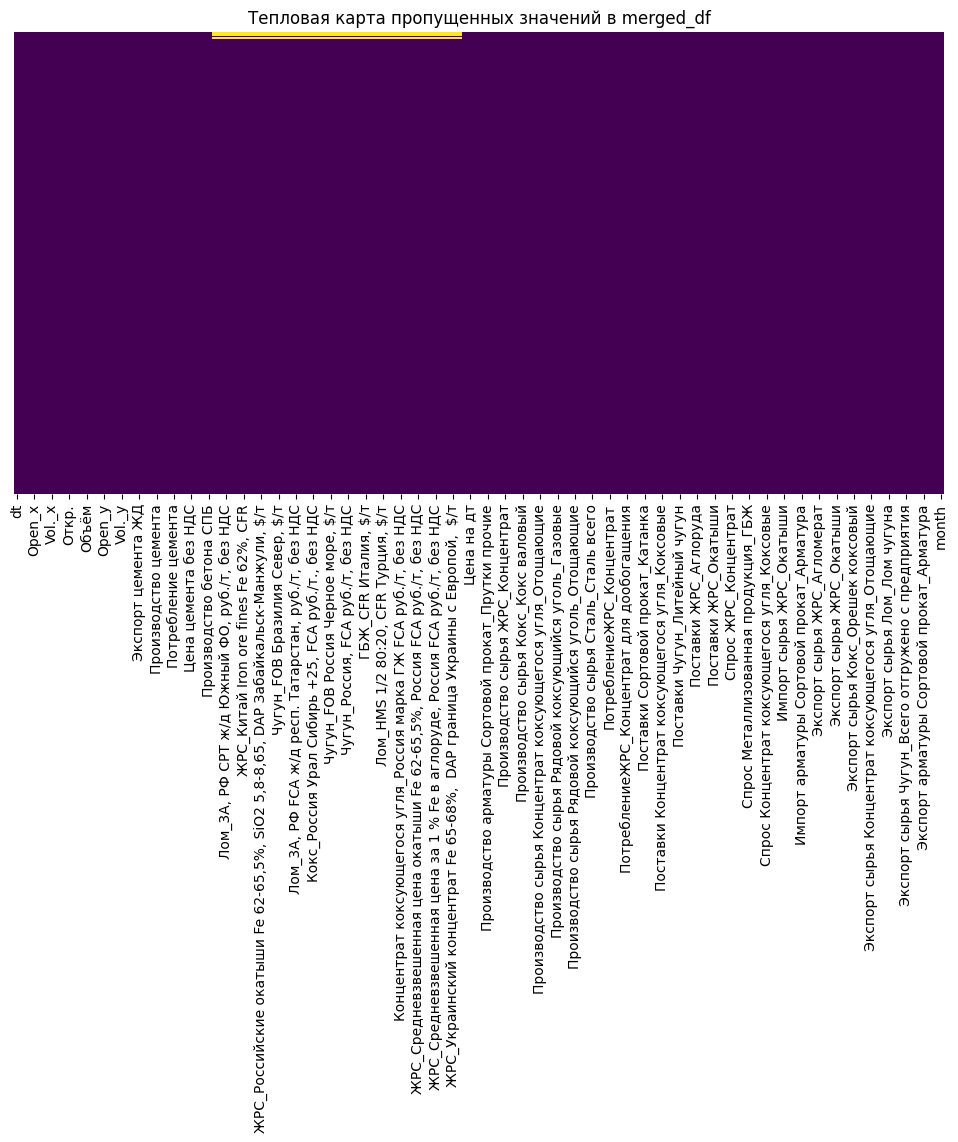

In [ ]:
plt.figure(figsize=(12, 6))

# Тепловая карта пропусков
sns.heatmap(merged_df.isnull(), cmap="viridis", cbar=False, yticklabels=False)

plt.title("Тепловая карта пропущенных значений в merged_df")
plt.show()

In [ ]:

merged_df["dt"] = maindf["dt"]
merged_df.head(15)



,dt,Цена на арматуру,Price_x,Open_x,High_x,Low_x,Vol._x,Change %_x,Цена,Откр.,...,Экспорт сырья Лом_Лом чугуна,Экспорт сырья Металлизованная продукция_Всего отгружено с предприятия,Экспорт сырья Металлизованная продукция_ГБЖ,Экспорт сырья Чугун_Всего отгружено с предприятия,Экспорт сырья Чугун_Литейный чугун,Экспорт сырья Чугун_Передельный чугун,Экспорт арматуры Сортовой прокат_Арматура,Экспорт арматуры Сортовой прокат_Катанка,Экспорт арматуры Сортовой прокат_Прутки прочие,month
0,2015-01-05,32900,1029.8,1005.4,1029.8,1002.0,929280.0,2.82,4470.0,4380.0,...,0.0,0.0,0.0,0.0,0.0,0.0,102.0,62.0,64.0,2015-01
1,2015-01-12,32500,1029.8,1005.4,1029.8,1002.0,929280.0,2.82,4470.0,4380.0,...,0.0,0.0,0.0,0.0,0.0,0.0,102.0,62.0,64.0,2015-01
2,2015-01-19,32000,1029.8,1005.4,1029.8,1002.0,929280.0,2.82,4470.0,4380.0,...,0.0,0.0,0.0,0.0,0.0,0.0,102.0,62.0,64.0,2015-01
3,2015-01-26,30700,1029.8,1005.4,1029.8,1002.0,929280.0,2.82,4470.0,4380.0,...,0.0,0.0,0.0,0.0,0.0,0.0,102.0,62.0,64.0,2015-01
4,2015-02-02,30300,1029.8,1005.4,1029.8,1002.0,929280.0,2.82,4470.0,4380.0,...,0.0,0.0,0.0,0.0,0.0,0.0,102.0,62.0,64.0,2015-02
5,2015-02-09,30300,1029.8,1005.4,1029.8,1002.0,929280.0,2.82,4470.0,4380.0,...,0.0,0.0,0.0,0.0,0.0,0.0,102.0,62.0,64.0,2015-02
6,2015-02-16,30100,1029.8,1005.4,1029.8,1002.0,929280.0,2.82,4470.0,4380.0,...,0.0,0.0,0.0,0.0,0.0,0.0,102.0,62.0,64.0,2015-02
7,2015-02-23,29400,1029.8,1005.4,1029.8,1002.0,929280.0,2.82,4470.0,4380.0,...,0.0,0.0,0.0,0.0,0.0,0.0,102.0,62.0,64.0,2015-02
8,2015-03-02,27200,1029.8,1005.4,1029.8,1002.0,929280.0,2.82,4470.0,4380.0,...,0.0,0.0,0.0,0.0,0.0,0.0,102.0,62.0,64.0,2015-03
9,2015-03-09,29200,1029.8,1005.4,1029.8,1002.0,929280.0,2.82,4470.0,4380.0,...,0.0,0.0,0.0,0.0,0.0,0.0,102.0,62.0,64.0,2015-03


In [ ]:
def replace_zeros_with_nearest(df):
    """
    Заменяет все нули в DataFrame на ближайшее ненулевое значение.

    :param df: pandas DataFrame
    :return: DataFrame с замененными нулями
    """
    df.replace(0, np.nan, inplace=True)  # Сначала заменяем 0 на NaN
    df.fillna(method="ffill", inplace=True)  # Заполняем вперед
    df.fillna(method="bfill", inplace=True)  # Заполняем назад
    return df
result = replace_zeros_with_nearest(merged_df)


<ipython-input-45-d4f51d55d5f9>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)  # Заполняем вперед
<ipython-input-45-d4f51d55d5f9>:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)  # Заполняем назад


In [ ]:
result.to_csv("result.csv", index=False, encoding="utf-8-sig")
from google.colab import files
files.download("result.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

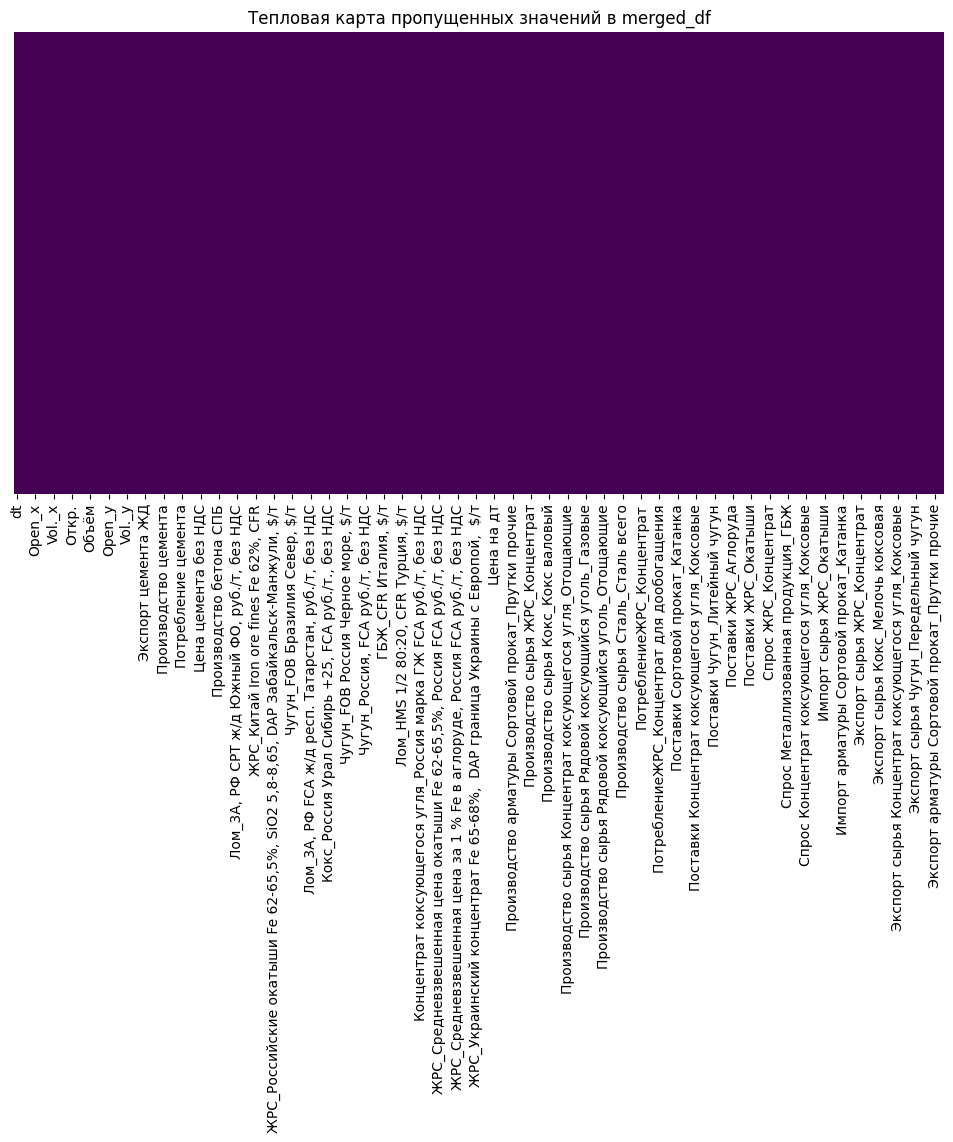

In [ ]:
plt.figure(figsize=(12, 6))

# Тепловая карта пропусков
sns.heatmap(result.isnull(), cmap="viridis", cbar=False, yticklabels=False)

plt.title("Тепловая карта пропущенных значений в merged_df")
plt.show()